<a href="https://colab.research.google.com/github/shreeramprasadbhat-creator/Banking-Bot-Orix/blob/main/heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**importing the dependencies**

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

**data collection and processing**

In [4]:
#loading the csv data into pandas
heart_data=pd.read_csv('/content/heart.csv')

**printing first 5 rows of the data**

In [5]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


**printing last five rowws of the data**

In [6]:
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


**checking the number of rows and columns**

In [7]:
heart_data.shape

(1025, 14)

**splitting the features and target**

In [8]:
x =heart_data.drop(columns='target',axis=1)
y= heart_data['target']

In [9]:
print(x)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

In [10]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


**splitting x into train data and test data**

In [11]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2, stratify=y,random_state=2)

In [12]:
print(x.shape, x_train.shape,x_test.shape)

(1025, 13) (820, 13) (205, 13)


**LOGISTIC REGRESSION**

In [13]:
model=LogisticRegression()

In [14]:
model.fit( x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**MODEL EVALUATION ACCURACY**

In [15]:
#accuracy score of training data
x_train_prediction=model.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)

In [16]:
print('Accuracy on Training data : ',training_data_accuracy)

Accuracy on Training data :  0.8524390243902439


In [17]:
#accuracy score of test data
x_test_prediction=model.predict(x_test)
test_data_accuracy=accuracy_score(x_test_prediction,y_test)

In [18]:
print('Accuracy on Test data : ',test_data_accuracy)

Accuracy on Test data :  0.8048780487804879


**BUILDING PREDICTING SYSTEM**

In [19]:
input_data = (43,0,0,132,341,1,0,136,1,3,1,0,3)

#change the input data to numpy array
input_data_as_numpy_array=np.asarray(input_data)

#reshape the numpy array as we are predicting for only on instance
input_data_reshape= input_data_as_numpy_array.reshape(1,-1)

prediction=model.predict(input_data_reshape)
print(prediction)

if (prediction[0]==0):
  print('the person is healthy,he do not have any heart disease')
else:
  print('the person is not healthy,he have heart disease')

[0]
the person is healthy,he do not have any heart disease


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


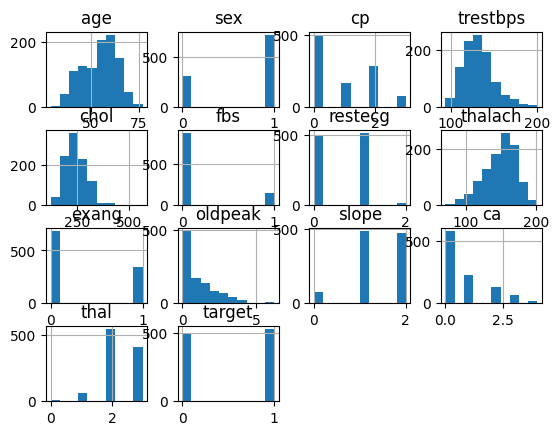

In [20]:
import matplotlib.pyplot as plt

# Histogram for all numerical columns
heart_data.hist()
plt.show()

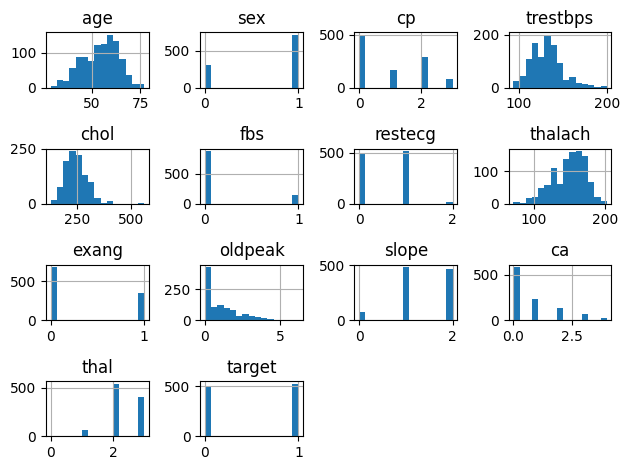

In [21]:
import matplotlib.pyplot as plt

# Single combined histogram for all features
heart_data.hist(bins=15)
plt.tight_layout()
plt.show()


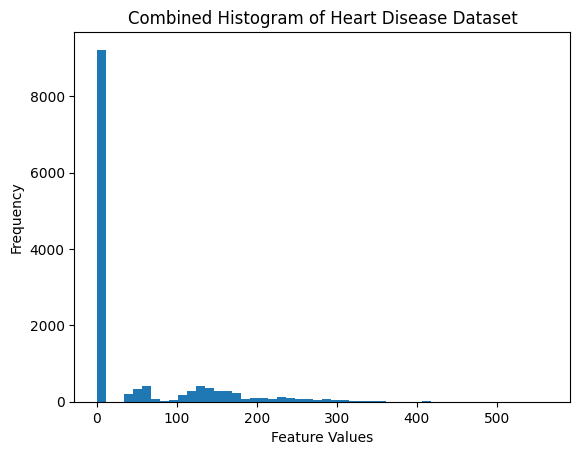

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Combine all feature values into one array
all_data = heart_data.drop(columns='target').values.flatten()

# Plot single histogram
plt.figure()
plt.hist(all_data, bins=50)
plt.title("Combined Histogram of Heart Disease Dataset")
plt.xlabel("Feature Values")
plt.ylabel("Frequency")
plt.show()


In [23]:
# Check missing values in each column
print(heart_data.isnull().sum())


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


Shape of dataset: (1025, 14)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB

Statistical Description:
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   


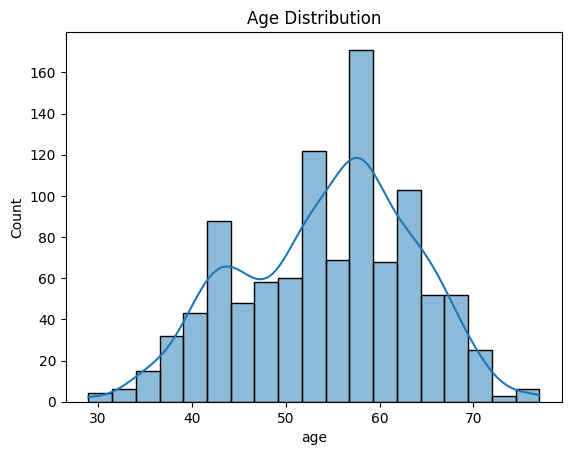

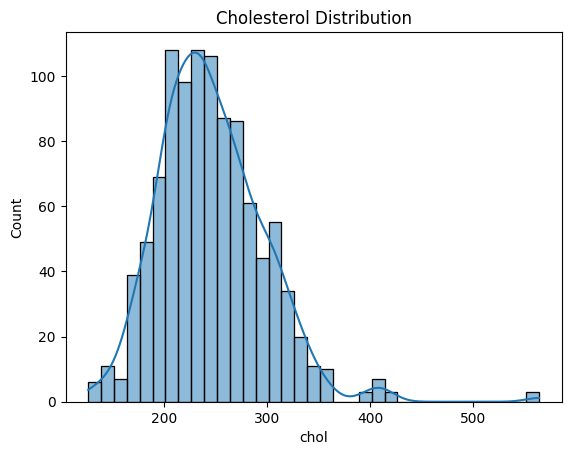

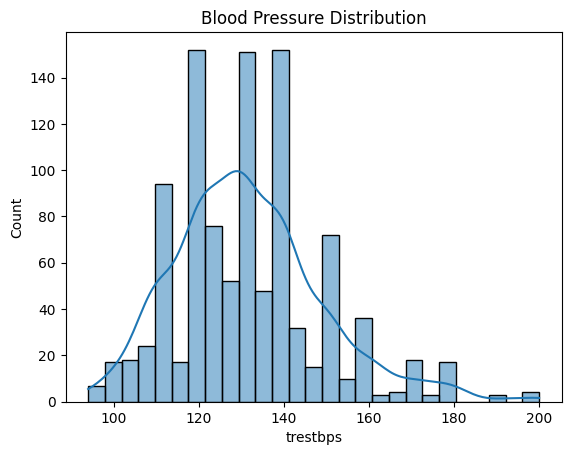

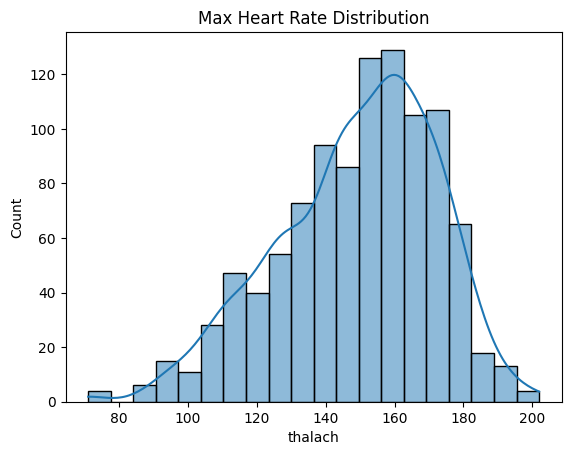

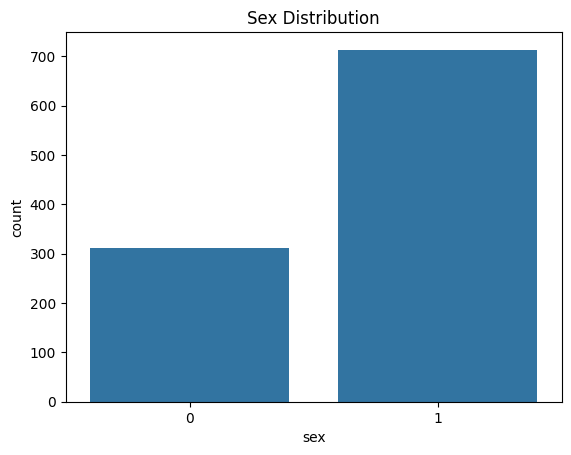

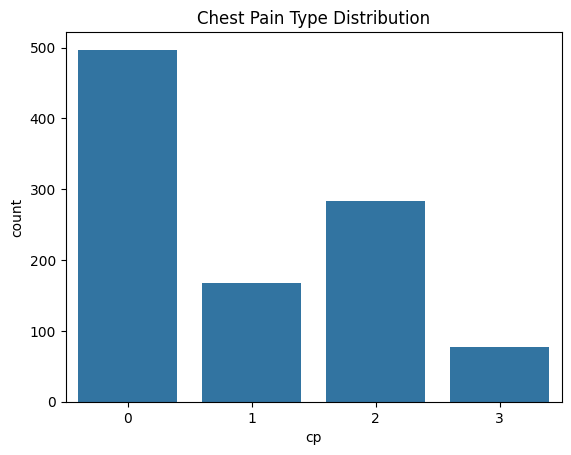

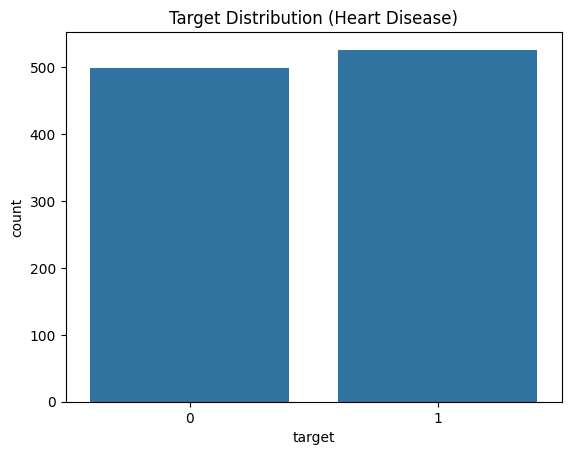

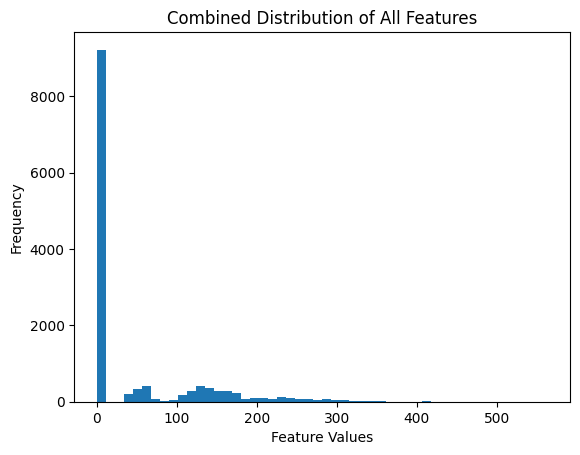

In [24]:
# ==============================
# Exploratory Data Analysis (EDA)
# ==============================

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ---------- Basic Data Audit ----------
print("Shape of dataset:", heart_data.shape)
print("\nDataset Info:")
heart_data.info()

print("\nStatistical Description:")
print(heart_data.describe())

# ---------- Missing Values ----------
print("\nMissing Values:")
print(heart_data.isnull().sum())

# ---------- Duplicate Values ----------
print("\nDuplicate Rows:", heart_data.duplicated().sum())

# ---------- Univariate Analysis (Histograms) ----------
plt.figure()
sns.histplot(heart_data['age'], kde=True)
plt.title("Age Distribution")
plt.show()

plt.figure()
sns.histplot(heart_data['chol'], kde=True)
plt.title("Cholesterol Distribution")
plt.show()

plt.figure()
sns.histplot(heart_data['trestbps'], kde=True)
plt.title("Blood Pressure Distribution")
plt.show()

plt.figure()
sns.histplot(heart_data['thalach'], kde=True)
plt.title("Max Heart Rate Distribution")
plt.show()

# ---------- Categorical / Discrete Analysis ----------
plt.figure()
sns.countplot(x='sex', data=heart_data)
plt.title("Sex Distribution")
plt.show()

plt.figure()
sns.countplot(x='cp', data=heart_data)
plt.title("Chest Pain Type Distribution")
plt.show()

plt.figure()
sns.countplot(x='target', data=heart_data)
plt.title("Target Distribution (Heart Disease)")
plt.show()

# ---------- Combined Single Histogram (All Features in One Graph) ----------
all_data = heart_data.drop(columns='target').values.flatten()

plt.figure()
plt.hist(all_data, bins=50)
plt.title("Combined Distribution of All Features")
plt.xlabel("Feature Values")
plt.ylabel("Frequency")
plt.show()


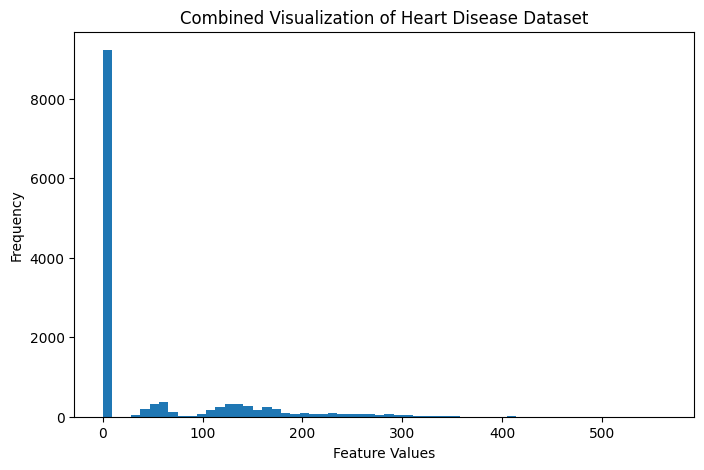

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Combine all feature values into one array
all_data = heart_data.drop(columns='target').values.flatten()

# Single combined histogram graph
plt.figure(figsize=(8,5))
plt.hist(all_data, bins=60)
plt.title("Combined Visualization of Heart Disease Dataset")
plt.xlabel("Feature Values")
plt.ylabel("Frequency")
plt.show()


In [26]:
def convert_to_num(value):
    try:
        # Handle range values like "2100 - 2850"
        if '-' in str(value):
            nums = value.split('-')
            return (float(nums[0]) + float(nums[1])) / 2

        # Handle single numeric values
        return float(value)

    except:
        # Handle non-numeric values
        return None

# Apply conversion to a column (example)
heart_data['chol'] = heart_data['chol'].apply(convert_to_num)

# Remove invalid values
heart_data = heart_data.dropna()


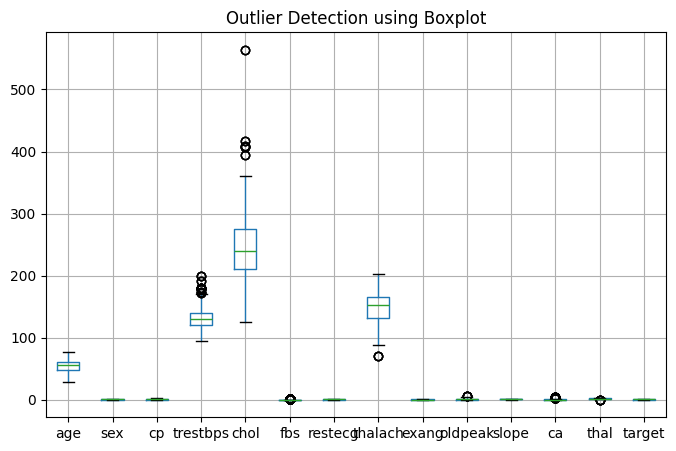

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
heart_data.boxplot()
plt.title("Outlier Detection using Boxplot")
plt.show()


In [28]:
import numpy as np
import scipy.stats as stats

data = heart_data['chol']   # you can change 'chol' to any feature
mean = np.mean(data)
std = np.std(data, ddof=1)
n = len(data)

confidence_level = 0.95
z = stats.norm.ppf((1 + confidence_level) / 2)

margin_error = z * (std / np.sqrt(n))
lower_ci = mean - margin_error
upper_ci = mean + margin_error

print("Mean:", mean)
print("95% Confidence Interval:", (lower_ci, upper_ci))


Mean: 246.0
95% Confidence Interval: (np.float64(242.8415586477306), np.float64(249.1584413522694))


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Features and target
X = heart_data.drop(columns='target')
y = heart_data['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y)

# Model development
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Evaluation Metrics
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))


Training Accuracy: 0.8585365853658536
Testing Accuracy: 0.8146341463414634

Confusion Matrix:
 [[75 25]
 [13 92]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.75      0.80       100
           1       0.79      0.88      0.83       105

    accuracy                           0.81       205
   macro avg       0.82      0.81      0.81       205
weighted avg       0.82      0.81      0.81       205



In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

# Performance Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("ROC-AUC Score:", roc_auc)


Accuracy: 0.8146341463414634
Precision: 0.7863247863247863
Recall: 0.8761904761904762
F1-Score: 0.8288288288288288
ROC-AUC Score: 0.8985714285714286


In [32]:
# Detailed Summary Statistics
import pandas as pd

print("Shape of Dataset:", heart_data.shape)
print("\nDataset Info:")
heart_data.info()

print("\nStatistical Summary:")
print(heart_data.describe())

print("\nMissing Values:")
print(heart_data.isnull().sum())

print("\nDuplicate Rows:")
print(heart_data.duplicated().sum())

print("\nTarget Variable Distribution:")
print(heart_data['target'].value_counts())


Shape of Dataset: (1025, 14)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   float64
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(2), int64(12)
memory usage: 112.2 KB

Statistical Summary:
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean

In [33]:
import pandas as pd

# Generate summary statistics table
summary_stats = heart_data.describe()

# Display in clean table format (like screenshot)
summary_stats


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000
